In [1]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import os

%matplotlib inline

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.12/06


Using hadd.sh, we merged all of these files together into one output, which we will run through now:

In [8]:
fnew = r.TFile("./results_histOnly_v9_11_00_16422.root") #processed output of hadd.sh
fold = r.TFile("../v9_08_00/results_histOnly_v9_08_00.root")

f = fnew

#check if the directory where we will be saving the images exists
prodString="v9_11_00"
directory = os.path.dirname("./images/"+prodString+"/")
if not os.path.exists(directory):
    print("Creating Image Directory:", directory)
    os.makedirs(directory)
else:
    print("Image Directory", directory,"exists. Continuing.")

Image Directory ./images/v9_11_00 exists. Continuing.


In [9]:
fnew.cd("farline/calo1")
#f.ls()

True

Print all of the embedded histograms.

137,273,607 Entries in these histograms
28,582,378 Entries in these histograms
137,273,607 Entries in these histograms
10,167,241 Entries in these histograms


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./images/v9_11_00/v9_11_00_farlineHistograms.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/v9_11_00/v9_11_00_farlineHistograms.root has been created


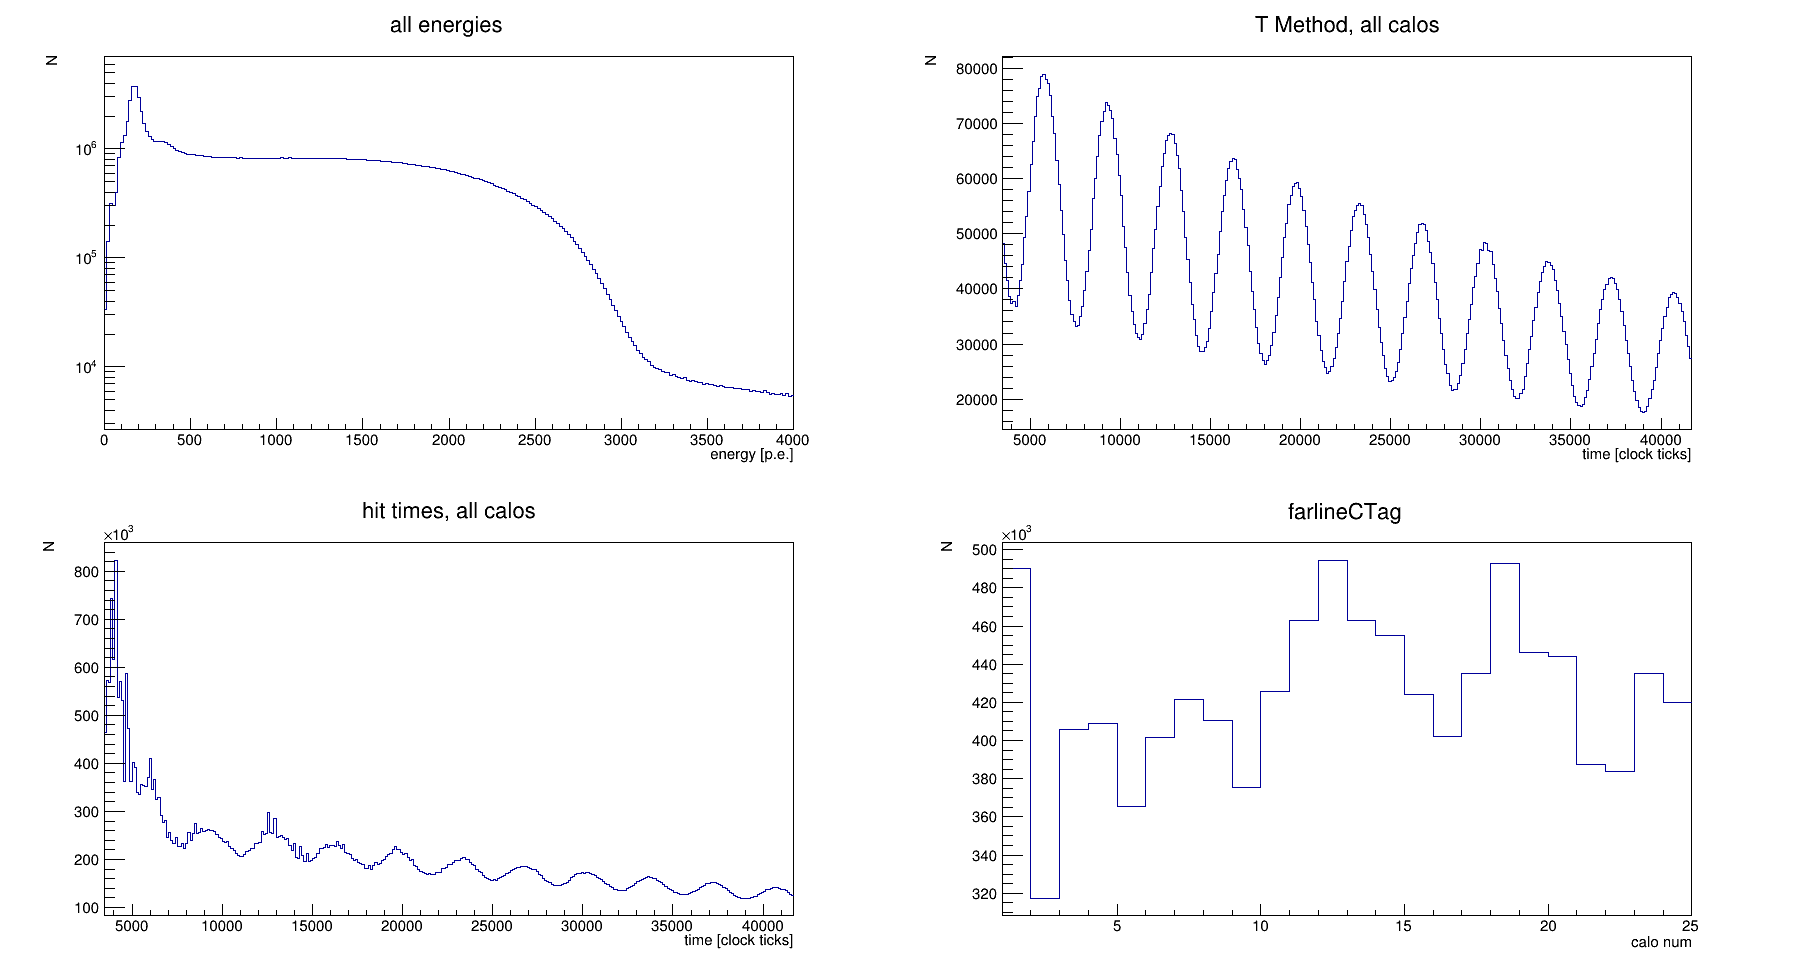

In [17]:
c = r.TCanvas("c","c",1800,1000)
c.Divide(2,2)
c.cd(1)
allCaloEnergies = fnew.Get("farline").Get("allCaloEnergies").Clone()
allCaloEnergies.Draw()
r.gPad.SetLogy()
c.Draw()

c.cd(2)
allCaloWiggle = fnew.Get("farline").Get("allCaloWiggle").Clone()
allCaloWiggle.Draw()
allCaloWiggle.GetXaxis().SetRange(30,350)

c.cd(3)
allCaloTimes = fnew.Get("farline").Get("allCaloTimes").Clone()
allCaloTimes.GetXaxis().SetRange(30,350)
allCaloTimes.Draw()

c.cd(4)
farlineCtag = fnew.Get("farline").Get("farlineCTag").Clone()
farlineCtag.Draw()

c.Draw()
c.Print("./images/"+prodString+"/"+prodString+"_farlineHistograms.png")
c.Print("./images/"+prodString+"/"+prodString+"_farlineHistograms.root")

print("{:,}".format(int(allCaloEnergies.GetEntries())), "Entries in these histograms")
print("{:,}".format(int(allCaloWiggle.GetEntries())), "Entries in these histograms")
print("{:,}".format(int(allCaloTimes.GetEntries())), "Entries in these histograms")
print("{:,}".format(int(farlineCtag.GetEntries())), "Entries in these histograms")

245,276,154 Entries in these histograms
51,137,223 Entries in these histograms
245,276,154 Entries in these histograms
18,436,990 Entries in these histograms


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./images/v9_11_00/v9_11_00_farlineHistograms.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/v9_11_00/v9_11_00_farlineHistograms.root has been created


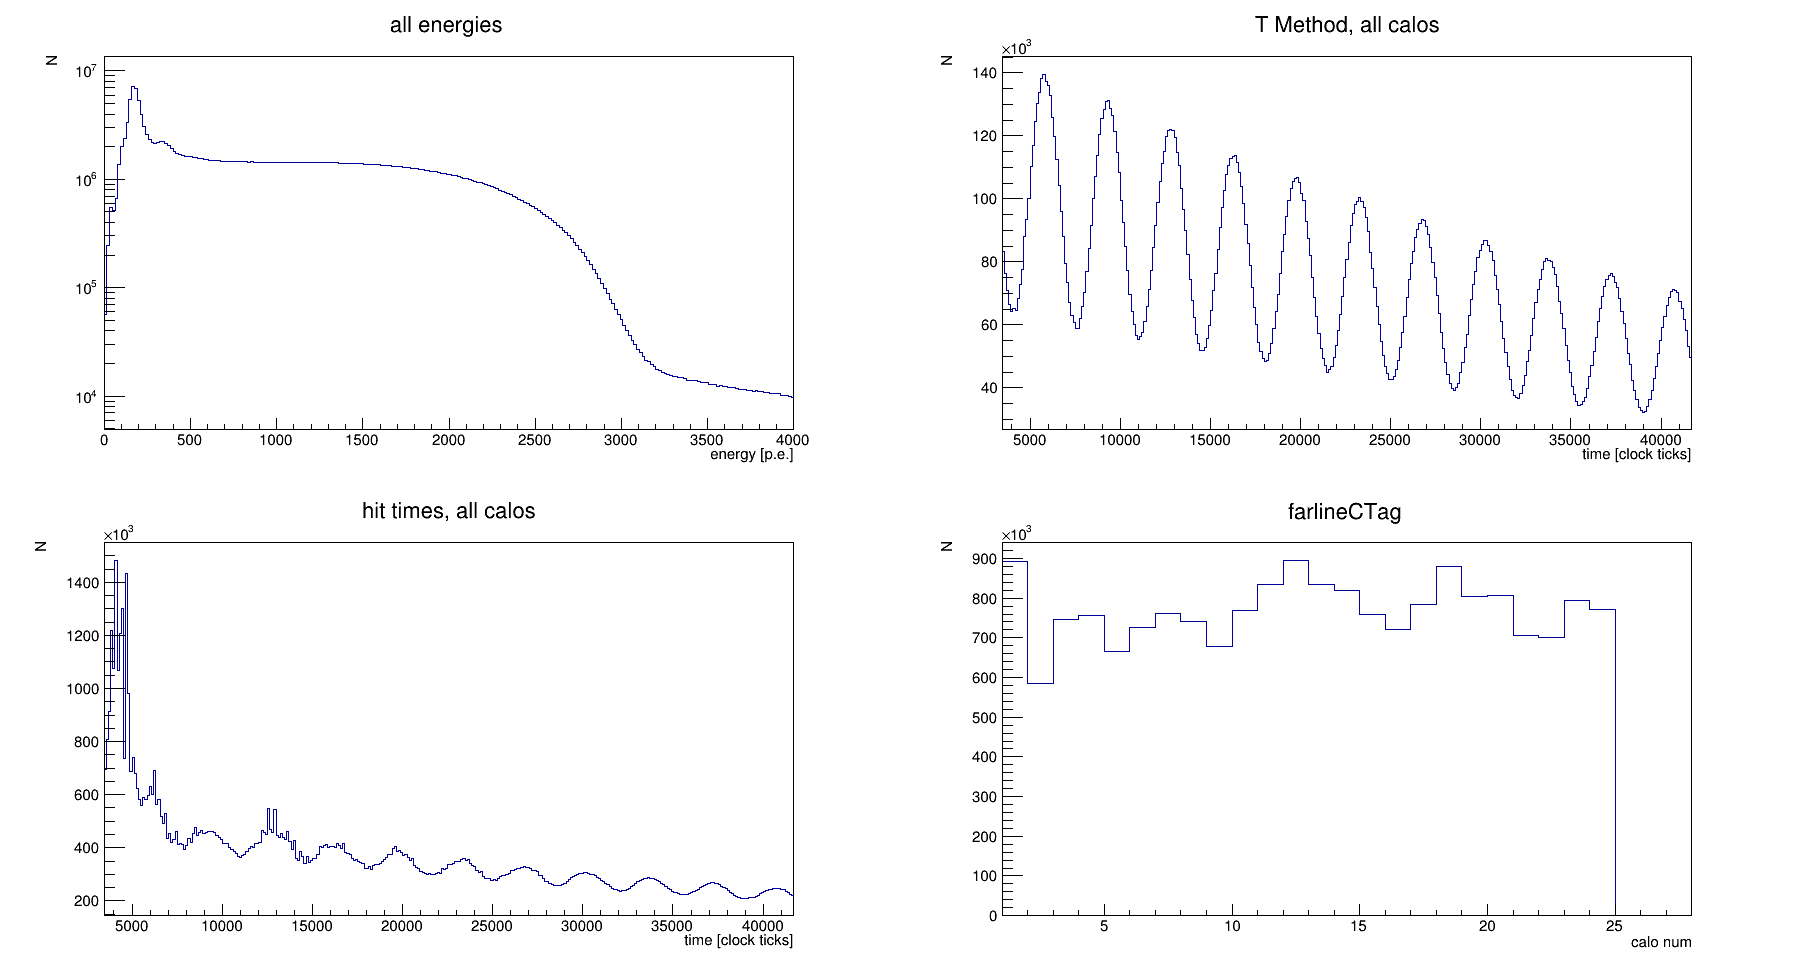

In [16]:
c = r.TCanvas("c","c",1800,1000)
c.Divide(2,2)
c.cd(1)
allCaloEnergies = fold.Get("farline").Get("allCaloEnergies").Clone()
allCaloEnergies.Draw()
r.gPad.SetLogy()
c.Draw()

c.cd(2)
allCaloWiggle = fold.Get("farline").Get("allCaloWiggle").Clone()
allCaloWiggle.Draw()
allCaloWiggle.GetXaxis().SetRange(30,350)

c.cd(3)
allCaloTimes = fold.Get("farline").Get("allCaloTimes").Clone()
allCaloTimes.GetXaxis().SetRange(30,350)
allCaloTimes.Draw()

c.cd(4)
farlineCtag = fold.Get("farline").Get("farlineCTag").Clone()
farlineCtag.Draw()

c.Draw()
c.Print("./images/"+prodString+"/"+prodString+"_farlineHistograms.png")
c.Print("./images/"+prodString+"/"+prodString+"_farlineHistograms.root")

print("{:,}".format(int(allCaloEnergies.GetEntries())), "Entries in these histograms")
print("{:,}".format(int(allCaloWiggle.GetEntries())), "Entries in these histograms")
print("{:,}".format(int(allCaloTimes.GetEntries())), "Entries in these histograms")
print("{:,}".format(int(farlineCtag.GetEntries())), "Entries in these histograms")

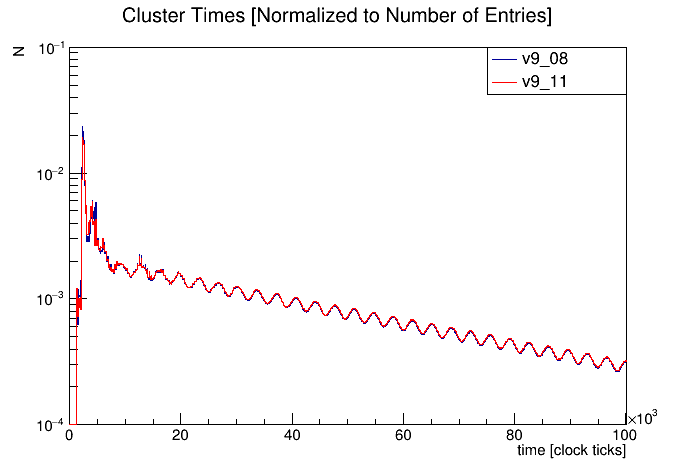

In [42]:
c = r.TCanvas()
allCaloTimesOld = fold.Get("farline").Get("allCaloTimes").Clone()
allCaloTimes = fnew.Get("farline").Get("allCaloTimes").Clone()

allCaloTimes.Scale(1/(allCaloTimes.GetEntries()))
allCaloTimesOld.Scale(1/(allCaloTimesOld.GetEntries()))

allCaloTimes.SetLineColor(2)

allCaloTimesOld.SetTitle("Cluster Times [Normalized to Number of Entries]")

allCaloTimesOld.GetXaxis().SetRangeUser(0,100000)
allCaloTimesOld.GetYaxis().SetRangeUser(0.0001,.1)

allCaloTimesOld.Draw("HIST")
allCaloTimes.Draw("HIST SAME")

c.SetLogy()

leg = r.TLegend(0.7,0.8,0.9,0.9)
leg.AddEntry(allCaloTimesOld ,"v9_08", "l")
leg.AddEntry(allCaloTimes ,"v9_11", "l")
leg.Draw()

c.Draw()

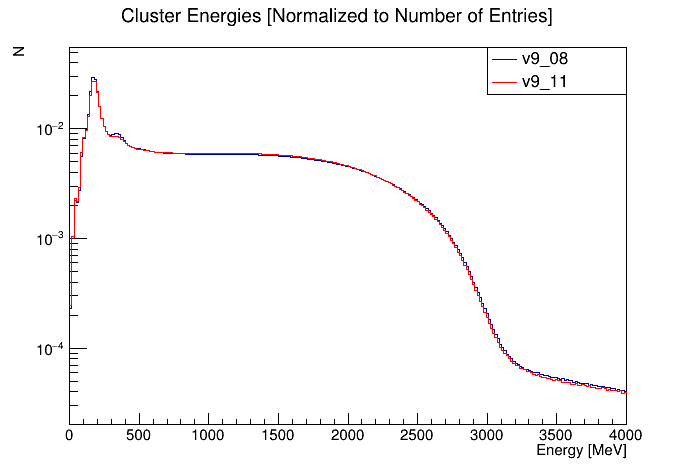

In [43]:
c = r.TCanvas()
allCaloEnergies = fnew.Get("farline").Get("allCaloEnergies").Clone()
allCaloEnergiesOld = fold.Get("farline").Get("allCaloEnergies").Clone()

allCaloEnergies.Scale(1/(allCaloEnergies.GetEntries()))
allCaloEnergiesOld.Scale(1/(allCaloEnergiesOld.GetEntries()))

allCaloEnergies.SetLineColor(2)

allCaloEnergiesOld.SetTitle("Cluster Energies [Normalized to Number of Entries]")
allCaloEnergiesOld.GetXaxis().SetTitle("Energy [MeV]")

allCaloEnergiesOld.Draw("HIST")
allCaloEnergies.Draw("HIST SAME")

c.SetLogy()

leg = r.TLegend(0.7,0.8,0.9,0.9)
leg.AddEntry(allCaloEnergiesOld ,"v9_08", "l")
leg.AddEntry(allCaloEnergies ,"v9_11", "l")
leg.Draw()

c.Draw()

# Now lets make a wiggle plot of all of the calos

In [10]:
# blinded instance
getBlinded = Blinders(FitType.Omega_a, 'This is my fight song. Blinding my plot song.')
def blinded_wiggle(x, p):
    norm  = p[0]
    life  = p[1]
    asym  = p[2]
    R     = p[3]
    phi   = p[4]
    
    time  = x[0]
    omega = getBlinded.paramToFreq(R)
#    omega = myBlinder.paramToFreq(R) unblind version
    
    return norm * math.exp(-time/life) * (1 - asym*math.cos(omega*time + phi))

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [11]:
func = r.TF1("func", blinded_wiggle, 30,600,5)
func.SetParNames('N','#tau','A','R','#phi')
func.SetParameters(700000,64.4,0.4,0,0)
func.SetParLimits(4,-0.001 - 2*math.pi,2*math.pi+0.001)
func.SetLineColor(2)
func.SetNpx(2000)

### Five parameter fit

0.0 560000.0
0.0 700.0
Sarting fit: 1
Sarting fit: 2
 FCN=4041.34 FROM MINOS     STATUS=SUCCESSFUL     36 CALLS         521 TOTAL
                     EDM=9.19421e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N            6.21604e+04   2.70686e+01   7.61528e-03   1.65586e-09
   2  #tau         6.42330e+01   1.57602e-02  -6.84172e-06  -6.65400e-05
   3  A            3.98358e-01   3.23033e-04  -1.12609e-08   3.00197e-05
   4  R           -1.56651e+01   9.12845e+00  -2.27163e-03  -2.19294e-07
   5  #phi        -1.05927e+00   1.49743e-03   1.49743e-03   1.18975e-02
 FCN=4041.34 FROM MINOS     STATUS=SUCCESSFUL     36 CALLS         282 TOTAL
                     EDM=3.32921e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SI

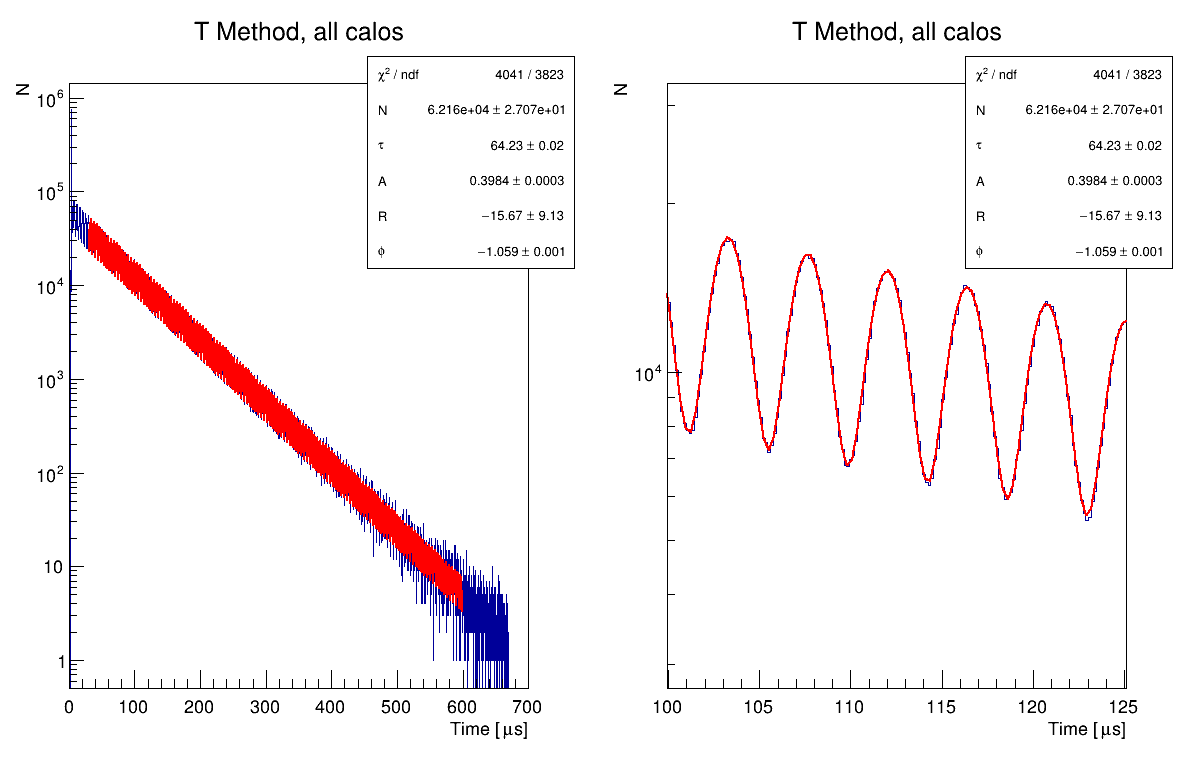

In [12]:
c2 = r.TCanvas("c2","c2",1200,800)
c2.Divide(2,1)
c2.cd(1)
r.gPad.SetLogy()

r.gStyle.SetOptFit(111)
allCaloWiggle = f.Get("farline").Get("allCaloWiggle").Clone()

print(allCaloWiggle.GetXaxis().GetXmin(),allCaloWiggle.GetXaxis().GetXmax())
allCaloWiggle.GetXaxis().SetLimits(allCaloWiggle.GetXaxis().GetXmin() / 1000 * 1.25,allCaloWiggle.GetXaxis().GetXmax() / 1000 * 1.25)
print(allCaloWiggle.GetXaxis().GetXmin(),allCaloWiggle.GetXaxis().GetXmax())
allCaloWiggle.GetXaxis().SetTitle("Time [#mus]")

residuals = allCaloWiggle.Clone() # this will be filled with the fit residuals later

for fit in range(2):
    print("Sarting fit:", fit+1)
    allCaloWiggle.Fit("func","REM")

    
chiSqAll = ( ( func.GetNDF(),
              func.GetChisquare(),
              func.GetProb() ) )
    
allCaloWiggle.Draw()

c2.cd(2)
ding =  allCaloWiggle.Clone()
ding.GetXaxis().SetRangeUser(100,125)
ding.Draw()

r.gPad.SetLogy()
c2.Draw()

Info in <TCanvas::Print>: png file ./images/v9_11_00/v9_11_00_TmethodWiggleFitAllCalos.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/v9_11_00/v9_11_00_TmethodWiggleFitAllCalos.root has been created


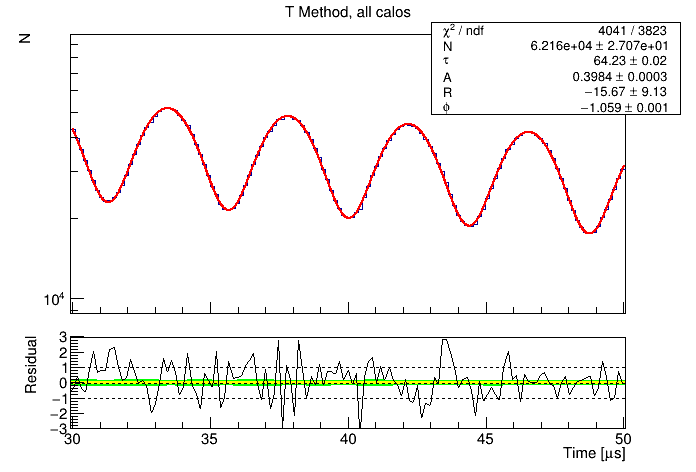

In [13]:
#The class calculates the  difference between the histogram and the fit function at each point 
#    and divides it by the uncertainty.
c3 = r.TCanvas()
allCaloWiggle.Draw()
c3.SetLogy()
c3.Draw()

rp1 = r.TRatioPlot(allCaloWiggle)
rp1.Draw()
rp1.GetLowerRefYaxis().SetTitle("Residual")
rp1.GetLowerRefYaxis().SetRangeUser(-3,3)

allCaloWiggle.GetXaxis().SetRangeUser(30,50)

c3.Update()
c3.Draw()
c3.Print("./images/"+prodString+"/"+prodString+"_TmethodWiggleFitAllCalos.png")
c3.Print("./images/"+prodString+"/"+prodString+"_TmethodWiggleFitAllCalos.root")

### Fourier transform of the 5-parameter residuals.

4700
3828 [(30.010638297872337, -81.00552870866522), (30.159574468085104, 82.79286974275601), (30.30851063829787, -72.68020617160073), (30.457446808510635, -113.46105162968888), (30.606382978723403, 149.827840573289)]
3828 569.9787234042552 29.93618966628871 599.9149130705439
0.1488972631672558 0.0017544514539549819
13.43208033147934 6.71604016573967


Info in <TCanvas::Print>: png file ./images/v9_11_00/v9_11_00_5ParamResiduals.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/v9_11_00/v9_11_00_5ParamResiduals.root has been created


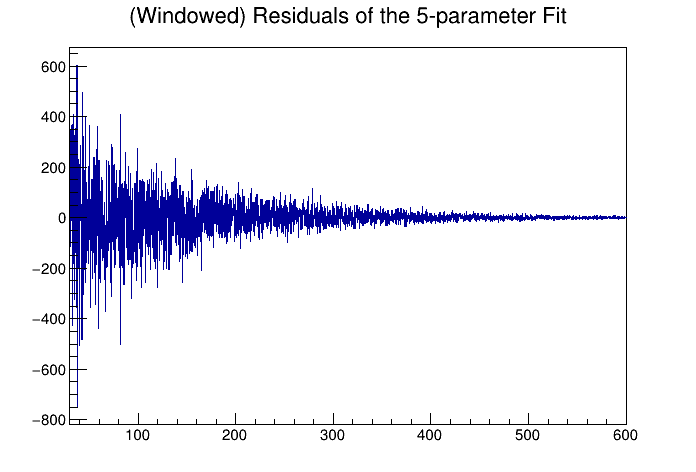

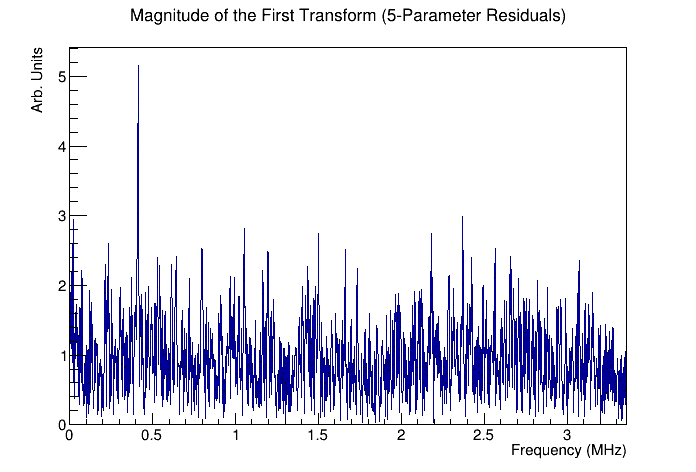

In [14]:
c3 = r.TCanvas()
residuals5param = residuals.Clone() # this will hold the residials from the 5-parameter fit
nBins = residuals5param.GetSize() - 2 #total number of bins excluding over/underflow
print(nBins)
residVec = []
for i in range(nBins):
    binCenterX = allCaloWiggle.GetXaxis().GetBinCenter(i)
    if (binCenterX > 30 and binCenterX < 600):
        residVec.append( (binCenterX, allCaloWiggle.GetBinContent(i) - func.Eval(binCenterX) ) )
        residuals5param.SetBinContent(i, allCaloWiggle.GetBinContent(i) - func.Eval(binCenterX))
    else:
        residuals5param.SetBinContent(i, 0)

print(len(residVec),[residVec[i] for i in range(5)])
centers, bins = zip(*residVec)
htest = r.TH1D("htest","htest",len(residVec),centers[0],centers[len(residVec)-1])
for i,ding in enumerate(bins):
    htest.SetBinContent(i, ding)
    
residuals5param.Delete()
residuals5param = htest
nBins = residuals5param.GetSize() - 2 #total number of bins excluding over/underflow

#apply a windows function to try to get rid of the imaginary peaks
welchVec = []
for i in range(nBins):
    unwindowed = residuals5param.GetBinContent(i)
    welch = 1 #- ( ( i - (nBins - 1) / 2) / ((nBins - 1) / 2) )**2
    welchVec.append(welch)
    residuals5param.SetBinContent(i, unwindowed *  welch)
    
residuals5param.Draw()
residuals5param.GetXaxis().SetRangeUser(30,700)
residuals5param.SetTitle("(Windowed) Residuals of the 5-parameter Fit")
c3.Draw()    
    
hxform = r.TH1D()
hxform = 0
r.TVirtualFFT.SetTransform(0)
hxform = residuals5param.FFT(hxform,"MAG P")
hxform.SetTitle("Magnitude of the First Transform (5-Parameter Residuals)")
#NOTE: for "real" frequencies you have to divide the x-axes range with the range of your function
#    y-axes has to be rescaled by a factor of 1/SQRT(n) to be right: this is not done automatically!
normXform = hxform.GetEntries()
hxform.Scale(1/normXform)
c2 = r.TCanvas()
c2.cd()
#c2.SetLogy()
hxform.GetXaxis().SetTitle("Frequency (MHz)")
hxform.GetYaxis().SetTitle("Arb. Units")
hxform.Draw("HIST P0 L")
c2.Draw()

Npart = residuals5param.GetSize() - 2
minBinCenter = residuals5param.GetXaxis().GetBinCenter(0)
maxBinCenter = residuals5param.GetXaxis().GetBinCenter(Npart)

capT = maxBinCenter - minBinCenter
print(Npart, capT, minBinCenter, maxBinCenter)
deltaT = capT/Npart #microseconds
deltaF = 1/capT
print(deltaT, deltaF)

deltaTns = deltaT*1000 #nanoseconds
limmaxHz = (1/(deltaTns*math.pow(10.0,-9)))
limmaxMHz = limmaxHz / math.pow(10.0,6)

limmax = 2*deltaF*Npart #400-25
print(limmax,limmaxMHz)
#hxform.GetXaxis().SetLimits(0,limmax)
nbins = residuals5param.GetSize() - 2
hxform.SetBins(Npart,0,limmaxMHz)
hxform.GetXaxis().SetRangeUser(0,limmaxMHz/2)
#hxform.GetXaxis().SetRangeUser(0,1.4)

residuals5paramXform = hxform.Clone()

#c2.SetLogy()
c2.Draw()
c2.Print("./images/"+prodString+"/"+prodString+"_5ParamResiduals.png")
c2.Print("./images/"+prodString+"/"+prodString+"_5ParamResiduals.root")